# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), și [sounddevice](https://python-sounddevice.readthedocs.io/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Generarea unui semnal sinusoidal

Întâi trebuie să definim parametrii sinusoidei continuue:

* orizontul de timp ($t$)
* frecvența semnalului original ($f_0$)
* amplitudinea ($A$)
* faza ($\varphi$)

In [2]:
time_of_view = 1     # s
frequency = 2        # Hz
amplitude = 1
phase = 0

Iar apoi parametrii de măsurare, sinusoida discretizată:
* frecvența de eșantionare ($f_s$)
* perioada de eșantionare ($t_s$)
* numărul de eșantionare ($n$)

In [3]:
sampling_rate = 12    # Hz
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period

Cu datele de mai sus putem genera orizontul de timp cu momentele de interes pentru semnalul continuu și cel discretizat ($t$, respectiv $nt_s$):

In [4]:
atime = np.linspace (0, time_of_view, int(10e5 + 1)) # s.
time = np.linspace (0, time_of_view, int(n_samples + 1))

*Observație*: orizontul de timp continuu (analog) este de fapt un orizont de timp discret ($nt_s$) foarte dens ($n=10^5$ eșantione).

Cu aceste date putem crea o funcție sinus ce generează sinusoidele parametrizate conform variabilelor de mai sus:

In [5]:
def sine (amplitude, frequency, time, phase):
    return amplitude * np.sin (2 * np.pi * frequency * time + phase)

## Sinusoidă continuă
Pentru a obține o sinusoidă "continuă" putem apela funcția ```sine```:

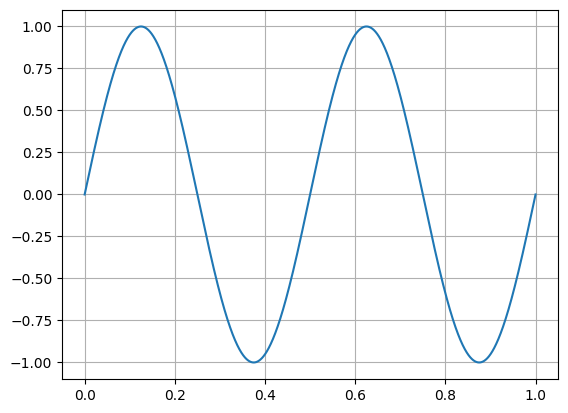

In [6]:
asignal = sine(amplitude, frequency, atime, phase)

plt.grid(True)
plt.plot (atime, asignal)

## Sinusoidă discretizată
Discretizarea se obține apelând aceiași funcție ```sine``` dar cu parametrii discreți și folosind ```stem``` pentru a obține cele $n$ eșantioane:

<StemContainer object of 3 artists>

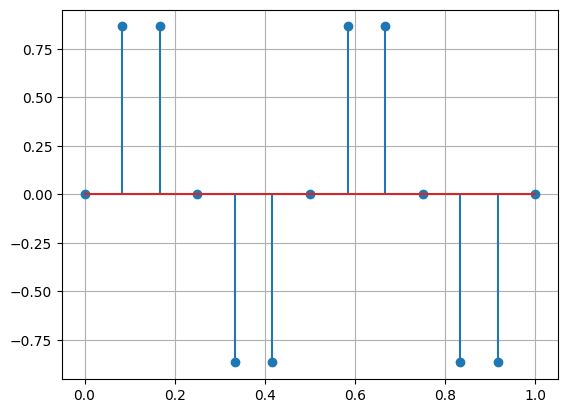

In [7]:
signal = sine(amplitude, frequency, time, phase)

plt.grid(True)
plt.stem (time, signal)

# Producerea și audiția unui ton

Pentru a produce o sinusoidă ce poate fi percepută de urechea umană trebuie să creștem frecvența și amplitudinea acesteia.

În exemplul de mai jos generăm o sinusoidă de frecvență $f_0=440\text{Hz}$ și amplitudine $10.000$ pe care o discretizăm cu frecvența de eșantionare $f_s=44.100\text{Hz}$ pe un orizont de timp de $2\text{s}$.

In [8]:
time_of_view = 2     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

tone = sine(amplitude, frequency, time, phase)

Aceast ton îl vom discretiza cu o frecvență de eșantionare $f_s$ conform ```sampling_rate``` și îl vom transforma în formatul WAV prin conversia eșantioanelor la întregi pe 16-biți:

In [9]:
sd.default.samplerate = sampling_rate
wav_wave = np.array(tone, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

# Sarcini

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Functie pentru generarea sinusoidei
def sine(amplitude, frequency, time, phase):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Parametri comuni
time_of_view = 0.5  # durata fiecărei note in secunde
amplitude = 10000
phase = 0
sampling_rate = 44100
sampling_period = 1.0 / sampling_rate
sd.default.samplerate = sampling_rate

# Frecventele notelor muzicale (scala Do, Re, Mi, Fa, Sol, La, Si, Do)
note_frequencies = {
    'Do': 261.63,   # C4
    'Re': 293.66,   # D4
    'Mi': 329.63,   # E4
    'Fa': 349.23,   # F4
    'Sol': 392.00,  # G4
    'La': 440.00,   # A4
    'Si': 493.88,   # B4
    'Do2': 523.25   # C5
}

# Mapare LilyPond la note
lilypond_to_note = {
    'c': 'Do',
    'd': 'Re',
    'e': 'Mi',
    'f': 'Fa',
    'g': 'Sol',
    'a': 'La',
    'b': 'Si',
    "c'": 'Do2'
}


def generate_tone(frequency, duration):
    """Genereaza un ton pentru o frecventa si durata data"""
    n_samples = duration / sampling_period
    time = np.linspace(0, duration, int(n_samples + 1))
    tone = sine(amplitude, frequency, time, phase)
    return np.array(tone, dtype=np.int16)


def play_notes(notes, note_duration=0.5):
    """Reda o secventa de note"""
    for note in notes:
        if note in note_frequencies:
            frequency = note_frequencies[note]
            tone = generate_tone(frequency, note_duration)
            sd.play(tone, blocking=True)
    sd.stop()


In [11]:
#1
def exercitiul_1():    
    notes = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si', 'Do2']
    
    # Afisare frecvente
    print("\nFrecventele notelor:")
    for note in notes:
        print(f"{note}: {note_frequencies[note]} Hz")
    
    # Redare audio
    print("\nSe redă scala muzicală...")
    play_notes(notes, note_duration=0.5)
    print("Redare completă!\n")


In [12]:
#2
def exercitiul_2():
    
    melody = [
        'Do', 'Re', 'Mi', 'Do',          
        'Do', 'Re', 'Mi', 'Do',           
        'Mi', 'Fa', 'Sol',                
        'Mi', 'Fa', 'Sol',                
        'Sol', 'La', 'Sol', 'Fa', 'Mi', 'Do',  
        'Sol', 'La', 'Sol', 'Fa', 'Mi', 'Do',  
        'Do', 'Sol', 'Do',                
        'Do', 'Sol', 'Do'                 
    ]
    
    print(f"\nMelodie: {' '.join(melody)}")
    print(f"Număr de note: {len(melody)}")
    
    # Generare semnal complet 
    note_duration = 0.4
    full_signal = np.array([], dtype=np.int16)
    
    for note in melody:
        if note in note_frequencies:
            frequency = note_frequencies[note]
            tone = generate_tone(frequency, note_duration)
            full_signal = np.concatenate([full_signal, tone])
    
    print("\nSe reda melodia compusa")
    sd.play(full_signal, blocking=True)
    sd.stop()
    print("Redare completa!\n")

In [ ]:
def exercitiul_3(lilypond_notation="c d e f g a b c'"):
    
    # Parsare notarie LilyPond
    lily_notes = lilypond_notation.strip().split()
    notes = []
    
    for lily_note in lily_notes:
        if lily_note in lilypond_to_note:
            notes.append(lilypond_to_note[lily_note])
    
    print(f"Note traduse: {' '.join(notes)}")
    print(f"Frecvențe: {[note_frequencies[n] for n in notes]} Hz")
    
    # Generare si redare semnal complet
    note_duration = 0.5
    full_signal = np.array([], dtype=np.int16)
    
    for note in notes:
        if note in note_frequencies:
            frequency = note_frequencies[note]
            tone = generate_tone(frequency, note_duration)
            full_signal = np.concatenate([full_signal, tone])
    
    print("\nSe reda melodia din partitura")
    sd.play(full_signal, blocking=True)
    sd.stop()   
    print("Redare completă!\n")
    
    return full_signal



In [14]:
if __name__ == "__main__":
    # 1
    exercitiul_1()
    input("Apasă Enter pentru următorul exercitiu")
    
    # 2
    exercitiul_2()
    input("Apasă Enter pentru următorul exercitiu")
    exercitiul_3("c d e f g a b c'")
    
    # 3
    frere_jacques_lily = "c d e c c d e c e f g e f g g a g f e c g a g f e c c g c c g c"
    exercitiul_3(frere_jacques_lily)
 


Frecventele notelor:
Do: 261.63 Hz
Re: 293.66 Hz
Mi: 329.63 Hz
Fa: 349.23 Hz
Sol: 392.0 Hz
La: 440.0 Hz
Si: 493.88 Hz
Do2: 523.25 Hz

Se redă scala muzicală...
Redare completă!


Melodie: Do Re Mi Do Do Re Mi Do Mi Fa Sol Mi Fa Sol Sol La Sol Fa Mi Do Sol La Sol Fa Mi Do Do Sol Do Do Sol Do
Număr de note: 32

Se reda melodia compusa
Redare completa!

Note traduse: Do Re Mi Fa Sol La Si Do2
Frecvențe: [261.63, 293.66, 329.63, 349.23, 392.0, 440.0, 493.88, 523.25] Hz

Se reda melodia din partitura
Redare completă!

Note traduse: Do Re Mi Do Do Re Mi Do Mi Fa Sol Mi Fa Sol Sol La Sol Fa Mi Do Sol La Sol Fa Mi Do Do Sol Do Do Sol Do
Frecvențe: [261.63, 293.66, 329.63, 261.63, 261.63, 293.66, 329.63, 261.63, 329.63, 349.23, 392.0, 329.63, 349.23, 392.0, 392.0, 440.0, 392.0, 349.23, 329.63, 261.63, 392.0, 440.0, 392.0, 349.23, 329.63, 261.63, 261.63, 392.0, 261.63, 261.63, 392.0, 261.63] Hz

Se reda melodia din partitura
Redare completă!

